<div align="center"><h1>BIG MART SALES ANALYSIS</h1></div>

### IMPORTING ALL NECESSARY LIBRARIES

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### LOADING THE DATASET

In [144]:
dt=pd.read_csv("bigmart_sales.csv")

In [145]:
dt.shape

(8523, 12)

In [146]:
dt.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [147]:
dt.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [148]:
dt.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [149]:
dt.describe(include="object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [150]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [151]:
dt.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [152]:
len(dt.columns)

12

In [153]:
# lets check the unique values for each columns  for categorical variables 
dt.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

### DATA PREPROCESSONG 

In [154]:
# Finding and treating the missing values 

In [155]:
dt.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [156]:
percentage_missing= (dt.isnull().sum()/len(dt))*100
print(percentage_missing.round(2))

Item_Identifier               0.00
Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.28
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64


In [157]:
dt.apply(lambda x:len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

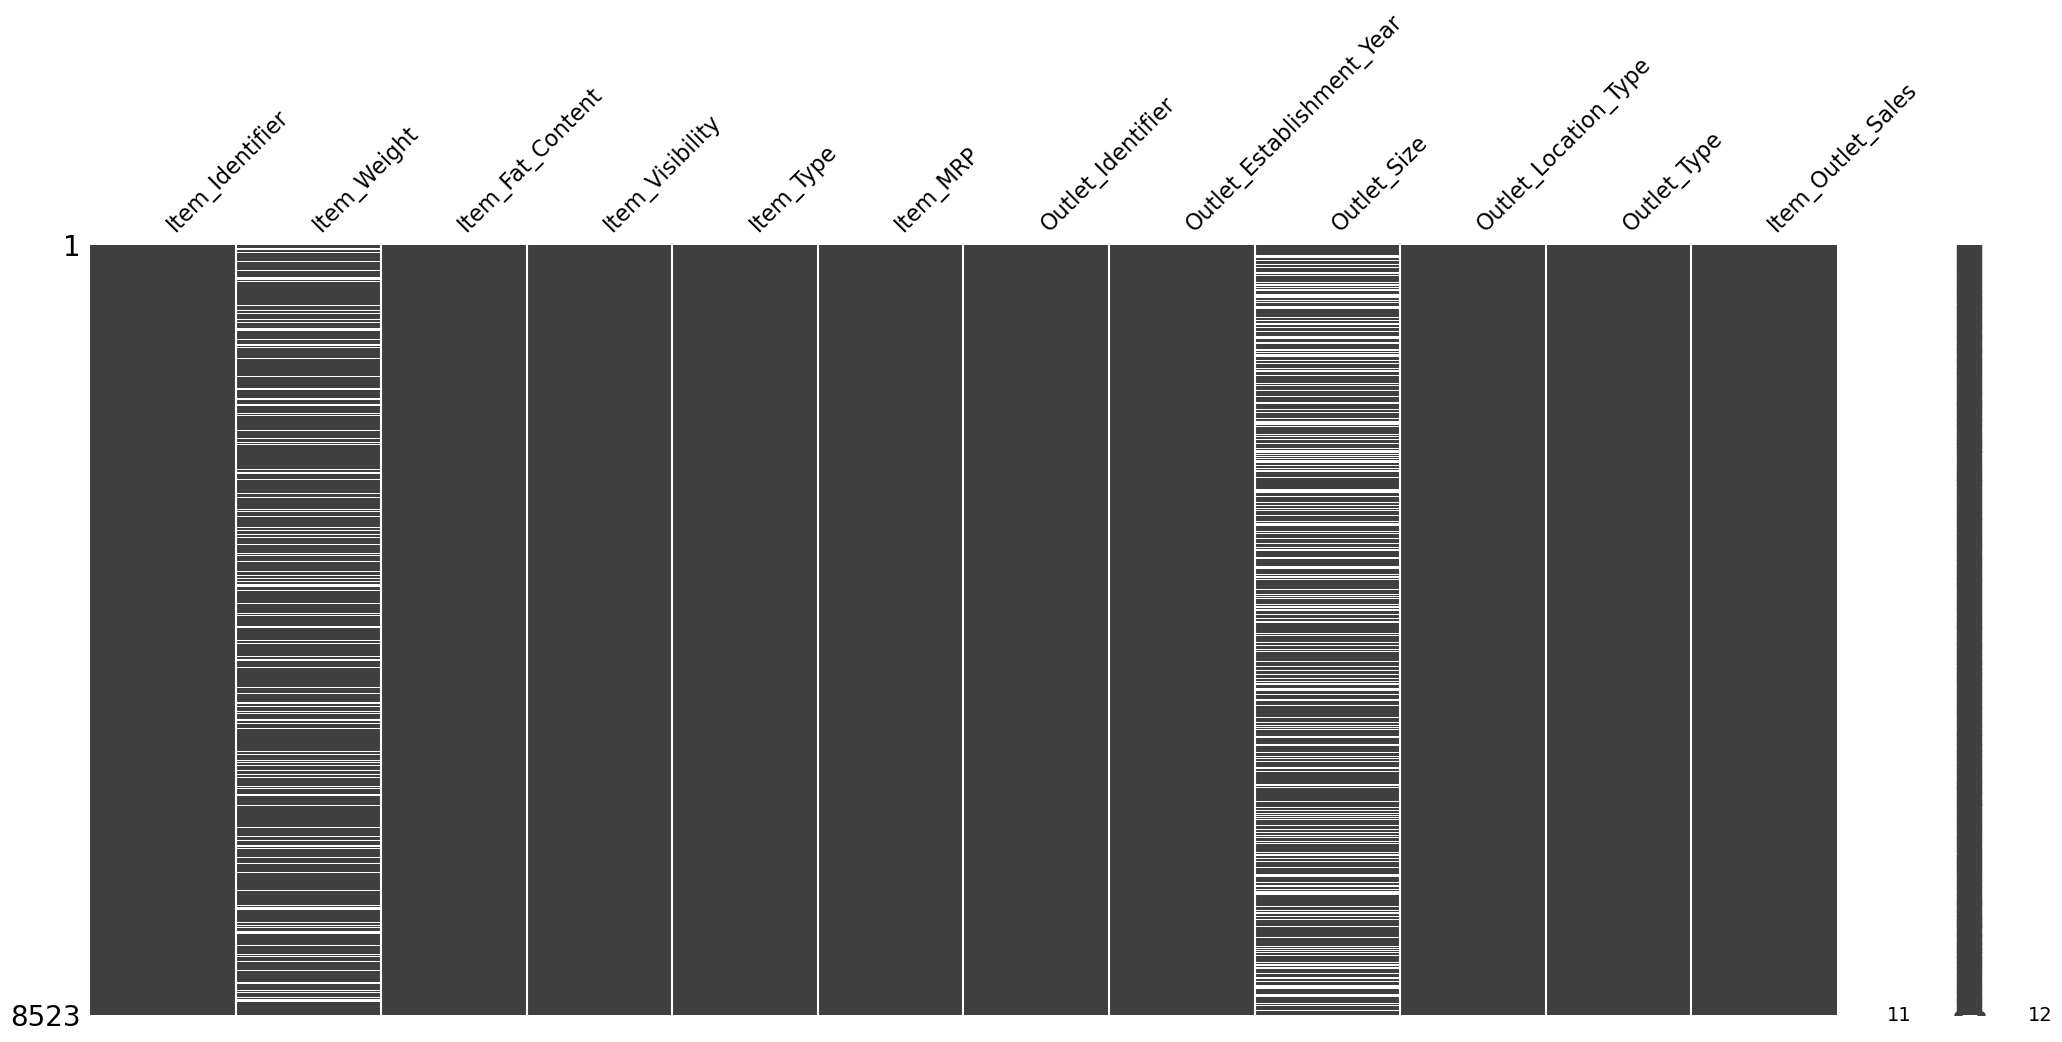

In [158]:
ms.matrix(dt)
plt.show()

In [159]:
# seprate the categorical columns from the data frame and seprate it in different variable 

In [160]:
cat_col=[]
for x in dt.dtypes.index:
    if dt.dtypes[x]=="object":
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [161]:
print(len(cat_col))

7


In [162]:
# remove item identifier and outlet identifier from the data as they are not of much use 

In [163]:
cat_col.remove("Outlet_Identifier")
cat_col.remove("Item_Identifier")
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [164]:
len(cat_col)

5

In [165]:
#  find all  the instances of uniques values in cat_col 

In [166]:
for col in cat_col:
   
    print(dt[col].value_counts())
    print()
    

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64



In [167]:
# find item weight mean

item_weight_mean= dt.pivot_table(values="Item_Weight",index="Item_Identifier")
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [168]:
miss_bool= dt["Item_Weight"].isnull()
miss_bool.head(20)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18     True
19    False
Name: Item_Weight, dtype: bool

In [169]:
# impute the  missing weight value 

In [170]:
for i,item in enumerate(dt["Item_Identifier"]):
    if miss_bool[i]:
        if item in item_weight_mean:
            dt["Item_Weight"][i]=item_weight_mean.loc[item]["Item_Weight"]
        else:
            dt["Item_Weight"]=np.mean(dt["Item_Weight"])

In [171]:
dt["Item_Weight"].isnull().sum()

0

In [172]:
# impute value for outlet_size

In [173]:
dt["Outlet_Size"].isnull().sum()

2410

In [174]:
outlet_size_mode= dt.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=(lambda x:x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [175]:
miss_bool1=dt["Outlet_Size"].isnull()

In [176]:
dt.loc[miss_bool1, 'Outlet_Size'] = dt.loc[miss_bool1, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [177]:
dt["Outlet_Size"].isnull().sum()

0

In [178]:
sum(dt['Item_Visibility']==0)

526

In [179]:
# replace all these zeros with mean 
dt.loc[:, 'Item_Visibility'].replace([0], [dt['Item_Visibility'].mean()], inplace=True)

In [180]:
sum(dt['Item_Visibility']==0)

0

In [181]:
# lets chage the item fat content 

dt["Item_Fat_Content"]=dt["Item_Fat_Content"].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

dt["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [182]:
# lets create NEW ATTRIBUTES WHICH WILL HELP US IN ANALYSI MORE 

In [183]:
# lets first extract the first two digits of item indentifier

In [184]:
dt["New_item_type"]=dt["Item_Identifier"].apply(lambda x:x[:2])
dt["New_item_type"]

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_item_type, Length: 8523, dtype: object

In [185]:
dt["New_item_type"]=dt["New_item_type"].replace({"FD":"Food","NC":"Non-Consumable","DR":"Drinks"})
dt.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_item_type
0,FDA15,12.857645,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,12.857645,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,12.857645,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,12.857645,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food
4,NCD19,12.857645,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


In [186]:
dt["New_item_type"].value_counts()

New_item_type
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [187]:
dt["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [188]:
print(dt[["New_item_type","Item_Fat_Content"]])

       New_item_type Item_Fat_Content
0               Food          Low Fat
1             Drinks          Regular
2               Food          Low Fat
3               Food          Regular
4     Non-Consumable          Low Fat
...              ...              ...
8518            Food          Low Fat
8519            Food          Regular
8520  Non-Consumable          Low Fat
8521            Food          Regular
8522          Drinks          Low Fat

[8523 rows x 2 columns]


In [189]:
#  add new category in item fat content ,where it is non  consumable replace it with non-edible

dt.loc[dt["New_item_type"]=="Non-Consumable","Item_Fat_Content"]="Non-Edible"

dt["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

In [190]:
#create small value for established year 

dt["Outlet_year"]=2021-dt["Outlet_Establishment_Year"]

dt["Outlet_year"]

0       22
1       12
2       22
3       23
4       34
        ..
8518    34
8519    19
8520    17
8521    12
8522    24
Name: Outlet_year, Length: 8523, dtype: int64

In [191]:
dt.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_item_type,Outlet_year
0,FDA15,12.857645,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,22
1,DRC01,12.857645,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,12
2,FDN15,12.857645,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,22
3,FDX07,12.857645,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,23
4,NCD19,12.857645,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,34


In [192]:
dt.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'New_item_type', 'Outlet_year'],
      dtype='object')

In [193]:
len(dt.columns)

14

### EXPLORATORY DATA ANALYSIS 

In [194]:
len(dt.select_dtypes(include=np.number).columns)

6

UNIVARIATE ANALYSIS USING DISTPLOT

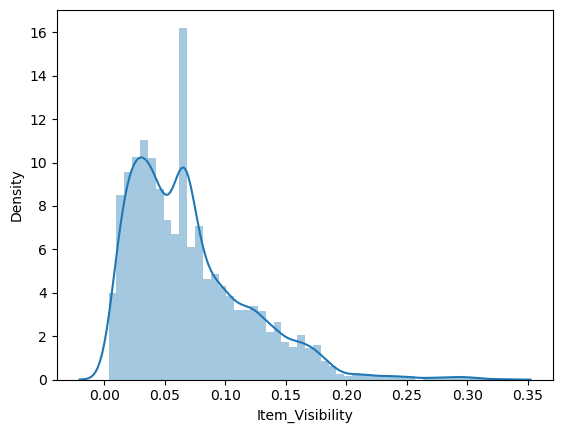

In [195]:
sns.distplot(dt['Item_Visibility'])
plt.show()

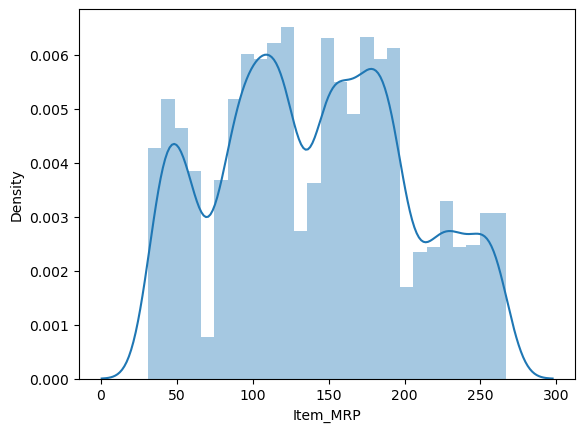

In [196]:
sns.distplot(dt["Item_MRP"])
plt.show()

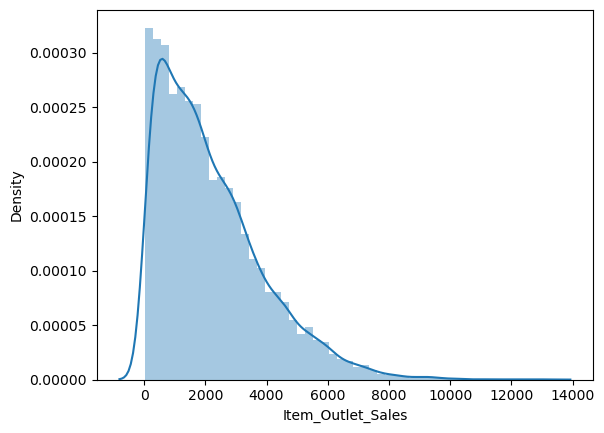

In [197]:
sns.distplot(dt["Item_Outlet_Sales"])
plt.show()

In [198]:
# lets  do log transformation of ITEM OUTLET SALES  so that distribution become normal

In [199]:
dt["Item_Outlet_Sales"]=np.log(1+dt["Item_Outlet_Sales"])

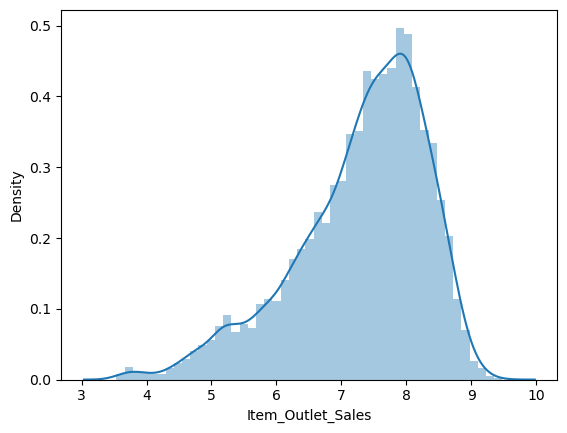

In [200]:
sns.distplot(dt["Item_Outlet_Sales"])
plt.show()

In [201]:
# kets do the univarite  visualization analysis of categorical variable

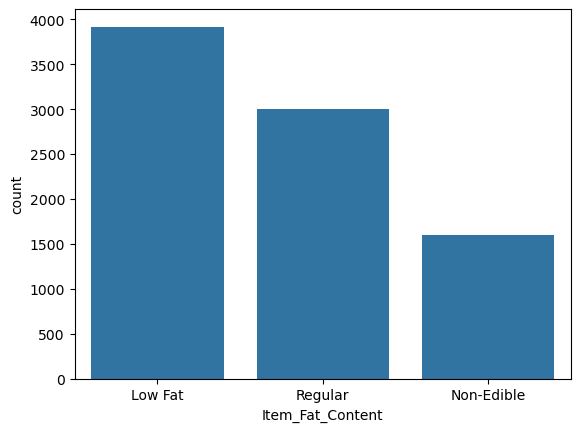

In [202]:
sns.countplot(x="Item_Fat_Content",data=dt)
plt.show()

In [203]:
dt["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables', 'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods', 'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned', 'Breads', 'Starchy Foods', 'Others', 'Seafood']


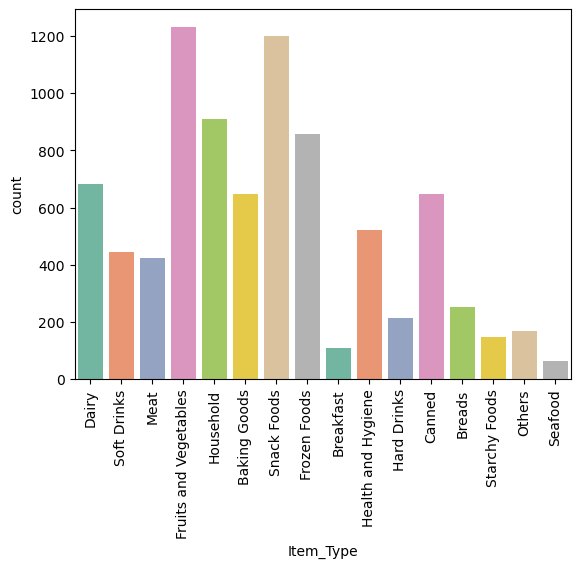

In [204]:
l=list(dt["Item_Type"].unique())
print(l)
c=sns.countplot(x=dt["Item_Type"],palette="Set2")
c.set_xticklabels(labels=l,rotation=90)
plt.show()

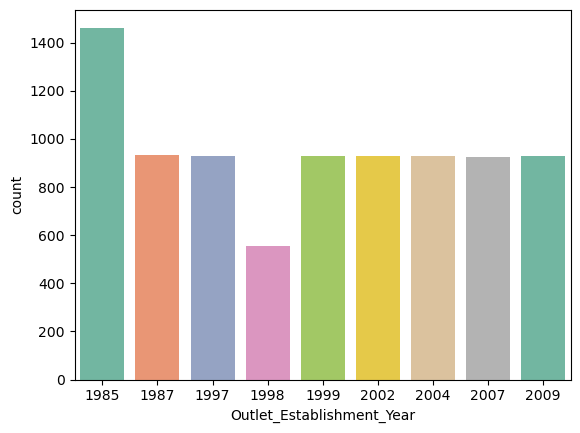

In [205]:
# count plot for established year 

sns.countplot(x=dt["Outlet_Establishment_Year"],palette="Set2")
plt.show()

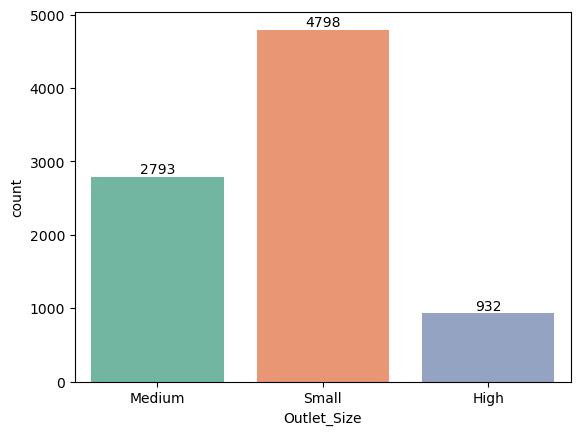

In [206]:
# count plot for outlet size

c2=sns.countplot(x=dt["Outlet_Size"],palette="Set2")
for container in c2.containers:
    c2.bar_label(container)
plt.show()

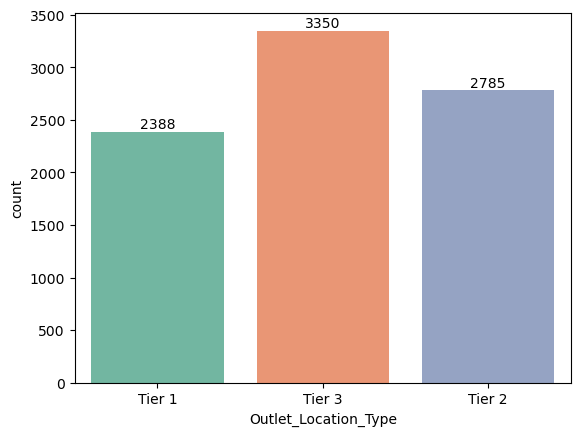

In [207]:
# count plot for outlet location type 

c=sns.countplot(x=dt["Outlet_Location_Type"],palette="Set2")
c.bar_label(c.containers[0])
c.bar_label(c.containers[1])
c.bar_label(c.containers[2])
plt.show()

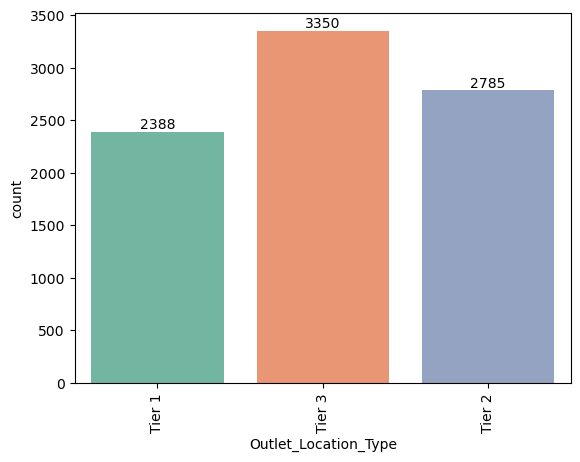

In [208]:
c1=sns.countplot(x=dt["Outlet_Location_Type"],palette="Set2")
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
for container in c1.containers:
    # Use ax.bar_label() on each container
    c1.bar_label(container)
plt.show()

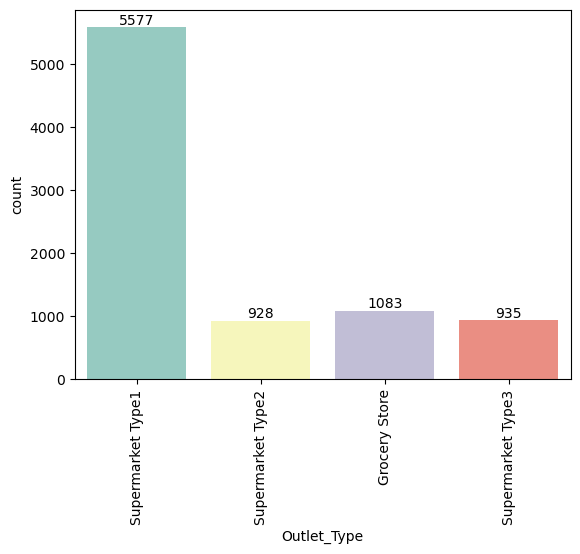

In [209]:
# count plot for out;et type 
l= list(dt["Outlet_Type"].unique())
c3=sns.countplot(x=dt["Outlet_Type"],palette="Set3")
c3.set_xticklabels(labels=l,rotation=90)
for container in c3.containers:
    c3.bar_label(container)

plt.show()

In [210]:
# CO-RELATION MATRIX  USING SEABORN HEATMAP

In [211]:
numeric=dt.select_dtypes(include=["number"])

corr=numeric.corr()
print(corr)

                           Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                        NaN              NaN       NaN   
Item_Visibility                    NaN         1.000000 -0.005259   
Item_MRP                           NaN        -0.005259  1.000000   
Outlet_Establishment_Year          NaN        -0.078355  0.005020   
Item_Outlet_Sales                  NaN        -0.202466  0.509886   
Outlet_year                        NaN         0.078355 -0.005020   

                           Outlet_Establishment_Year  Item_Outlet_Sales  \
Item_Weight                                      NaN                NaN   
Item_Visibility                            -0.078355          -0.202466   
Item_MRP                                    0.005020           0.509886   
Outlet_Establishment_Year                   1.000000           0.077032   
Item_Outlet_Sales                           0.077032           1.000000   
Outlet_year                                -1.000000          -0.0

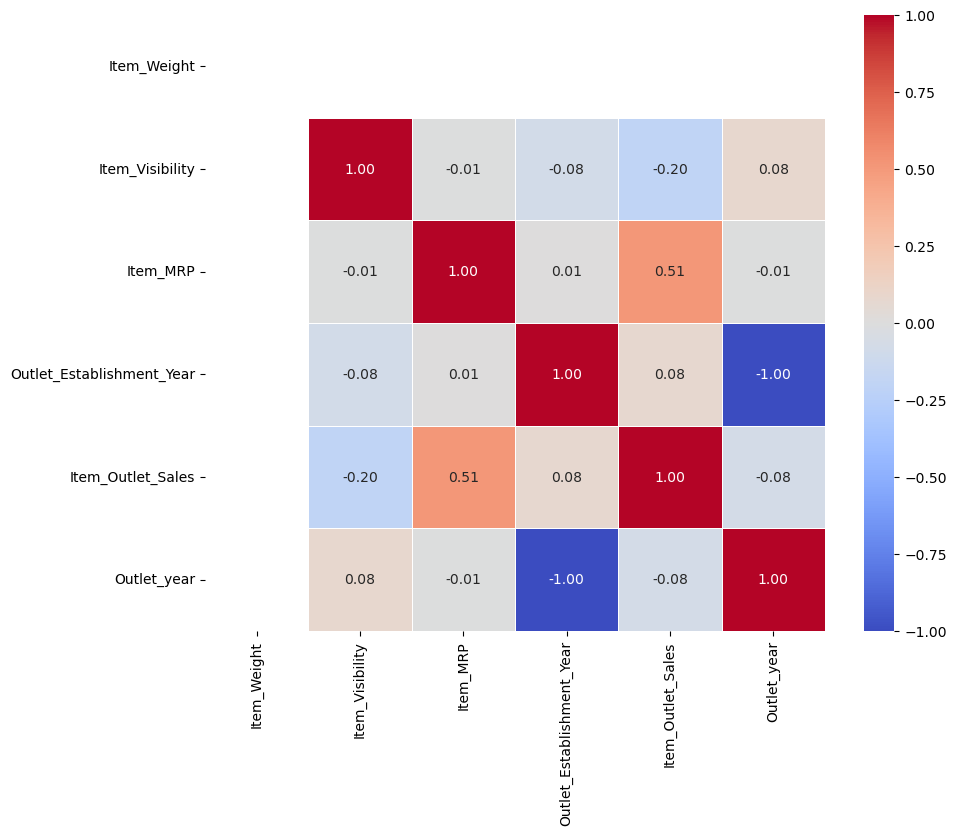

In [212]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f',linewidths=.5)
plt.show()

In [213]:
dt.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_item_type,Outlet_year
0,FDA15,12.857645,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,22
1,DRC01,12.857645,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,12
2,FDN15,12.857645,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,22
3,FDX07,12.857645,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,23
4,NCD19,12.857645,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,34


In [214]:
# label encoding to cover categorical variable to numerical variable 

In [215]:
from sklearn.preprocessing import LabelEncoder

In [216]:
le=LabelEncoder()

dt["Outlet"]=le.fit_transform(dt["Outlet_Identifier"])

In [217]:
cat_col1=["Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type","New_item_type"]

for col in cat_col1:
    dt[col]=le.fit_transform(dt[col])

In [218]:
dt.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_item_type,Outlet_year,Outlet
0,FDA15,12.857645,0,0.016047,4,249.8092,OUT049,1999,1,0,1,8.225808,1,22,9
1,DRC01,12.857645,2,0.019278,14,48.2692,OUT018,2009,1,2,2,6.096776,0,12,3
2,FDN15,12.857645,0,0.016760,10,141.6180,OUT049,1999,1,0,1,7.648868,1,22,9
3,FDX07,12.857645,2,0.066132,6,182.0950,OUT010,1998,2,2,0,6.597664,1,23,0
4,NCD19,12.857645,1,0.066132,9,53.8614,OUT013,1987,0,2,1,6.903451,2,34,1


In [219]:
dt.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'New_item_type', 'Outlet_year',
       'Outlet'],
      dtype='object')

In [220]:
dt.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_item_type,Outlet_year,Outlet
0,FDA15,12.857645,0,0.016047,4,249.8092,OUT049,1999,1,0,1,8.225808,1,22,9
1,DRC01,12.857645,2,0.019278,14,48.2692,OUT018,2009,1,2,2,6.096776,0,12,3
2,FDN15,12.857645,0,0.016760,10,141.6180,OUT049,1999,1,0,1,7.648868,1,22,9
3,FDX07,12.857645,2,0.066132,6,182.0950,OUT010,1998,2,2,0,6.597664,1,23,0
4,NCD19,12.857645,1,0.066132,9,53.8614,OUT013,1987,0,2,1,6.903451,2,34,1


#### One Hot Encoding

In [221]:
dt=pd.get_dummies(dt,columns=["Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type","New_item_type"],dtype=int)

In [222]:
dt.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_year,Outlet,Item_Fat_Content_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_item_type_0,New_item_type_1,New_item_type_2
0,FDA15,12.857645,0.016047,249.8092,OUT049,1999,8.225808,22,9,1,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,12.857645,0.019278,48.2692,OUT018,2009,6.096776,12,3,0,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,12.857645,0.016760,141.6180,OUT049,1999,7.648868,22,9,1,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,12.857645,0.066132,182.0950,OUT010,1998,6.597664,23,0,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,12.857645,0.066132,53.8614,OUT013,1987,6.903451,34,1,0,...,0,0,1,0,1,0,0,0,0,1


##### DATA SPLITTING INTO X AND Y

In [224]:
X= dt.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y=dt['Item_Outlet_Sales']

In [225]:
y.head(5)

0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

### MODEL TRAINING 

In [226]:
from sklearn.model_selection import train_test_split

In [227]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [228]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [229]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_Scaled= scaler.fit_transform(X)


In [230]:
# as we have to create dofferent dofferent model so leta create a funcion it will save out time 

def train(model,X_Scaled,y):
    model.fit(X_Scaled,y)
    
    pred=model.predict(X_Scaled)

    cv_score= cross_val_score(model,X_Scaled,y,scoring='neg_mean_squared_error',cv=5)
    cv_score=np.abs(np.mean(cv_score))
    print("Model Report")
    print("CV Score:", cv_score)



In [231]:
# USE LINER MODEL FOR MODEL TRAINING

from sklearn.linear_model import LinearRegression,Ridge,Lasso


Model Report
CV Score: 0.2841994760175713


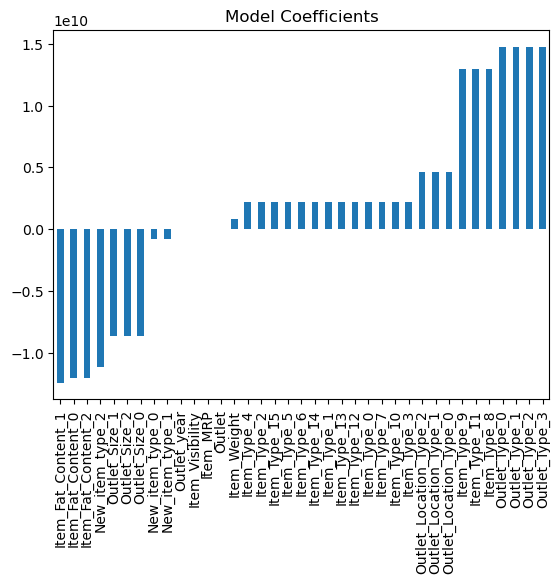

In [232]:
# Liner Regression Model

model= LinearRegression()

train(model,X_train,y_train)

coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
plt.show()

Model Report
CV Score: 0.2843552567009123


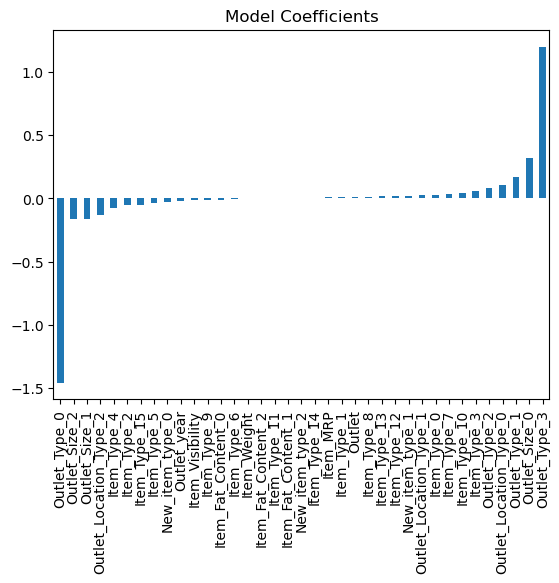

In [233]:
# RIDGE REGRESSION

model1=Ridge()
train(model1,X_train,y_train)
coef = pd.Series(model1.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
plt.show()

Model Report
CV Score: 0.7534899315973709


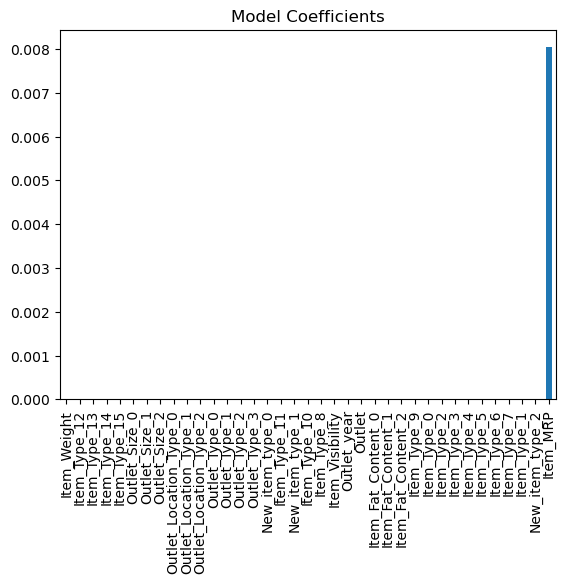

In [234]:
# LASSO

model2 = Lasso()
train(model2, X_train, y_train)
coef = pd.Series(model2.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
plt.show()

Model Report
CV Score: 0.559021816041426


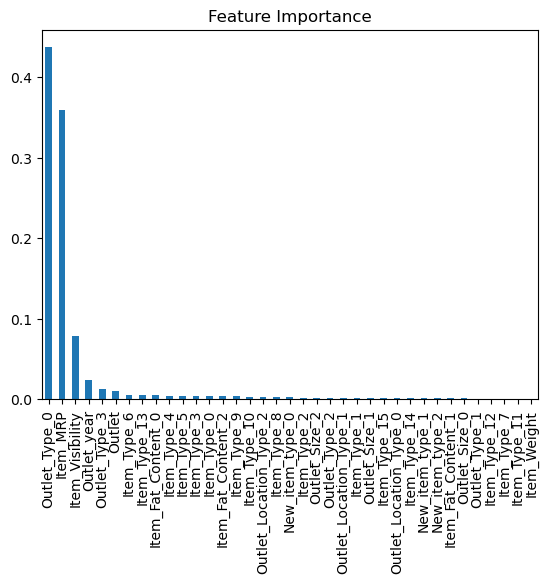

In [235]:
# DECISION TREE REGRESSOR 
from sklearn.tree import DecisionTreeRegressor

model3= DecisionTreeRegressor()

train(model3,X_train,y_train)

coef = pd.Series(model3.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

In [236]:
from sklearn.ensemble import RandomForestRegressor

Model Report
CV Score: 0.301107911867638


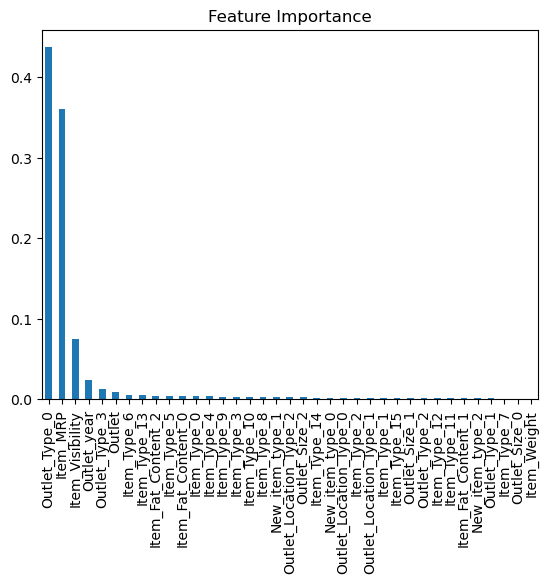

In [237]:
# Random Forest Regressor

model4=RandomForestRegressor( n_estimators=100)

train(model4,X_train,y_train)
coef = pd.Series(model4.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

Model Report
CV Score: 0.3476068496410886


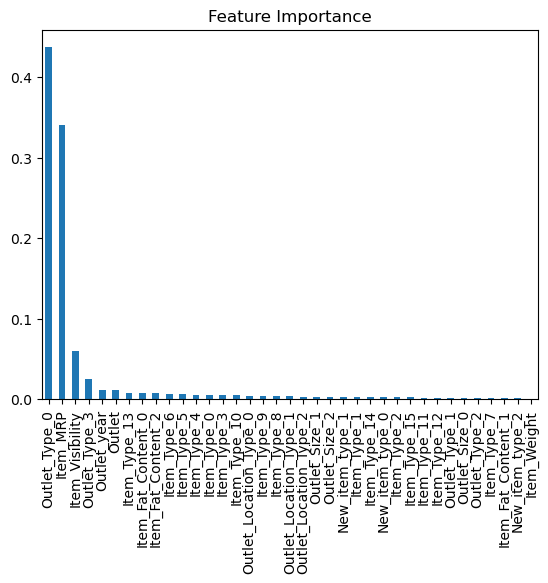

In [238]:
# EXTRA TREE REGRESSOR

from sklearn.ensemble import ExtraTreesRegressor

model5= ExtraTreesRegressor()

train(model5,X_train,y_train)

coef = pd.Series(model5.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

[LightGBM] [Info] Total Bins 594
[LightGBM] [Info] Number of data points in the train set: 5966, number of used features: 36
[LightGBM] [Info] Start training from score 7.295854
[LightGBM] [Info] Total Bins 594
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 36
[LightGBM] [Info] Start training from score 7.292207
[LightGBM] [Info] Total Bins 594
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 36
[LightGBM] [Info] Start training from score 7.293465
[LightGBM] [Info] Total Bins 594
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 36
[LightGBM] [Info] Start training from score 7.297274
[LightGBM] [Info] Total Bins 594
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 36
[LightGBM] [Info] Start training from score 7.289242
[LightGBM] [Info] Total Bins 594
[LightGBM] [Info] Number of data points in the train set: 4773, number of use

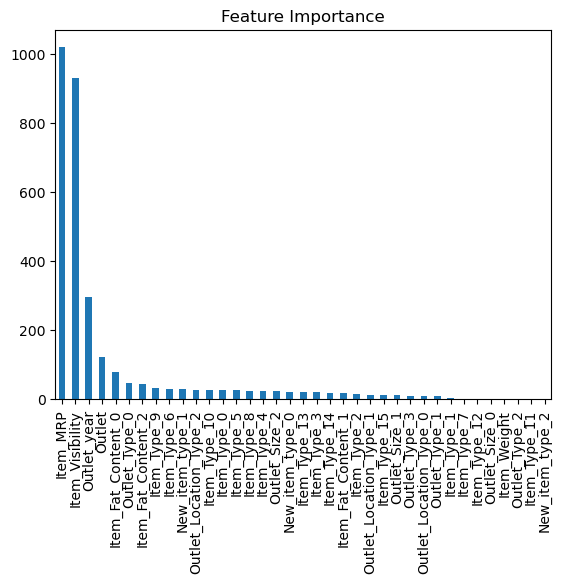

In [239]:
# LGBM REGRESSOR 

from lightgbm import LGBMRegressor

model6= LGBMRegressor(force_col_wise=True)

train(model6,X_train,y_train)

coef = pd.Series(model6.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

Model Report
CV Score: 0.3173006219087801


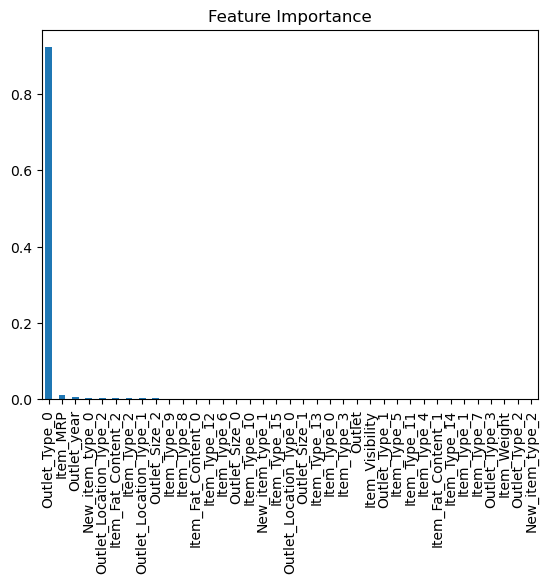

In [240]:
from xgboost import XGBRegressor

model7= XGBRegressor()

train(model7,X_train,y_train)

coef = pd.Series(model7.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

### HYPERPARAMETER TUNING 

In [241]:
from sklearn.model_selection import RandomizedSearchCV

#### RANDOM FOREST REGRESSOR

In [242]:
# randomized search cv
max_features=["auto","sqrt"]
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf= [1,2,5,10]

In [243]:
random_grid= { 'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}
print(random_grid)
              


{'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [244]:
rf=RandomForestRegressor()

In [245]:
rf= RandomizedSearchCV(estimator = rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,
                        verbose=2,random_state=42,n_jobs=1)

rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [246]:
print(rf.best_params_)
print(rf.best_score_)
print(rf.best_estimator_)
predictions=rf.predict(X_test)

{'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
-0.29173573151373444
RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_split=15)


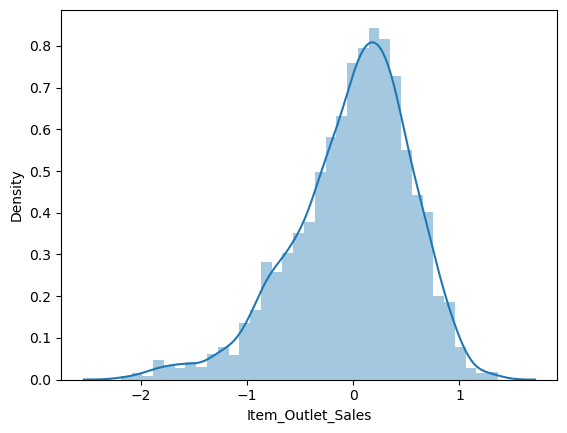

In [247]:
sns.distplot(y_test-predictions)
plt.show()

#### LGBM REGRESSOR HYPER PARAMETER TUNING 

In [248]:
from scipy.stats import uniform,randint

In [249]:
params={ 'min_split_gain':uniform(0,0.5),
        'learning_rate':uniform(0.03,0.3),
        'max_depth':randint(2,6),
        'n_estimators':randint(100,150),
        'subsample':uniform(0.6,0.4)
       }


In [250]:
lgb=LGBMRegressor()

In [251]:
lgb=lgb = RandomizedSearchCV(estimator = lgb, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
lgb.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 594
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 36
[LightGBM] [Info] Start training from score 7.292207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000020487B08740>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000204880BE960>,
                                        'min_split_gain': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000204880BD6D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000204FA7DE0C0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000020487B46C60>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [252]:
print(lgb.best_params_)
print(lgb.best_score_)
print(lgb.best_estimator_)
predictions1= lgb.predict(X_test)

{'learning_rate': 0.14236203565420874, 'max_depth': 2, 'min_split_gain': 0.0917173949330819, 'n_estimators': 107, 'subsample': 0.8394633936788146}
-0.2665788789317089
LGBMRegressor(learning_rate=0.14236203565420874, max_depth=2,
              min_split_gain=0.0917173949330819, n_estimators=107,
              subsample=0.8394633936788146)


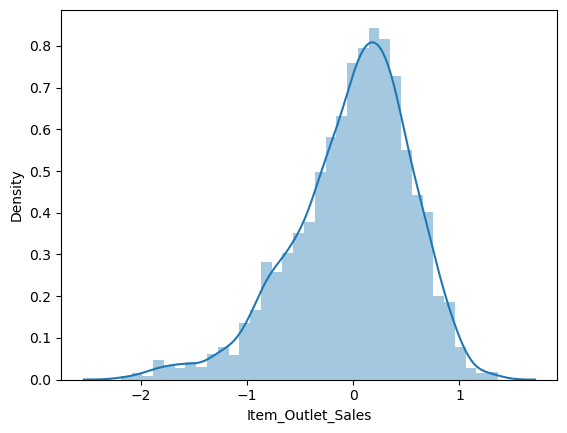

In [253]:
sns.distplot(y_test-predictions,kde=True)
plt.show()

#### XGB REGRESSOR HYPERPARAMETER TUNING 

In [258]:
params = {
    "min_split_gain": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [259]:
xgb= XGBRegressor()

In [260]:
xgb= RandomizedSearchCV(estimator=xgb, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
xgb.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.14236203565420874, max_depth=2, min_split_gain=0.0917173949330819, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END learning_rate=0.14236203565420874, max_depth=2, min_split_gain=0.0917173949330819, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END learning_rate=0.14236203565420874, max_depth=2, min_split_gain=0.0917173949330819, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END learning_rate=0.14236203565420874, max_depth=2, min_split_gain=0.0917173949330819, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END learning_rate=0.14236203565420874, max_depth=2, min_split_gain=0.0917173949330819, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END learning_rate=0.07680559213273094, max_depth=4, min_split_gain=0.04998745790900144, n_estimators=110, subsample=0.9464704583099741; tot

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                        'min_split_gain': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000020487BF82C0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000204FA4536E0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002048830F260>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [262]:
print(xgb.best_params_)
print(xgb.best_score_)
print(xgb.best_estimator_)
predictions=xgb.predict(X_test)

{'learning_rate': 0.05718193035984624, 'max_depth': 3, 'min_split_gain': 0.09983689107917987, 'n_estimators': 102, 'subsample': 0.9439761626945282}
-0.2669284803023052
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05718193035984624, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, min_split_gain=0.09983689107917987,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=102, n_jobs=None, ...)


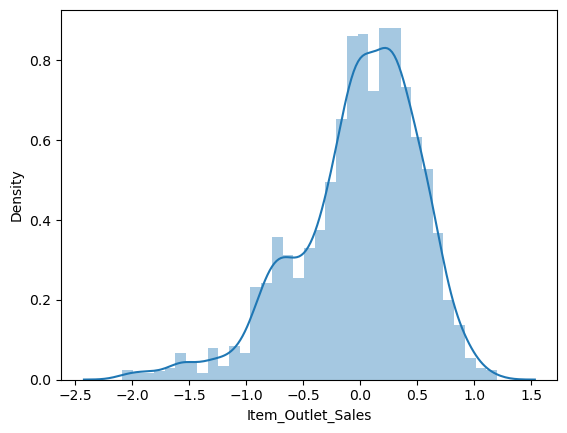

In [263]:
sns.distplot(y_test-predictions)
plt.show()